<a href="https://colab.research.google.com/github/adrianadamata/Data_Science_COVID-19/blob/master/COVID_19_no_contexto_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# COVID-19: No rastro dos dados...


<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/adrianadamata/Data_Science_COVID-19/master/covid.jpg"></center>




## Contextualizando...

### Origem no mercado de frutos do mar

COVID-19 é uma doença causada pelo coronavírus SARS-COV2. Este novo vírus foi identificado na China, após pacientes apresentarem quadro de pneumonia com causa desconhecida. Esses pacientes foram  vinculados a um mercado atacadista de frutos do mar e animais úmidos na China. 

### Risco dos assintomáticos
Inicialmente, o grande número de pessoas infectadas na cidade de Wuhan, China, alarmou o mundo devido a seu alto potencial de contágio. Isso ocorre pois pessoas assintomáticas também transmitem o vírus. A doença pode evoluir para quadros severos de pneumonia e causar mortes, principalmente em indivíduos mais vulneráveis ao vírus (estudos a respeito das comorbidades que mais representam risco ao COVID-19 ainda estão em fase de andamento). 

### Reconhecimento da pandemia
Em Março, a Organização Mundial de Saúde reconheceu o COVID-19 como pandemia e há uma verdadeira confusão a respeito de tratamentos em potencial. 

### Conflitos a respeito de tratamentos
Atualmente, em Julho de 2020 alguns estados e municípios brasileiros adotaram um tratamento como tentativa de evitar mortes. O tratamento foi adotado após pesquisas científicas in vitro indicarem a ação de medicamentos no combate ao vírus. Fato é que não há tempo hábil para que essas pesquisas sejam validadas e aqui há um conflito do que se pode ou não fazer até que tenhamos resultados comprovados. Em todo o mundo, estudos têm sido realizados, porém os resultados ainda são inconclusivos.

### Experiência Pessoal com o tratamento foi eficaz

O que posso relatar é minha experiência pessoal. Meu pai possui comorbidades relacionadas ao risco de COVID-19 como hipertensão e diabetes. No quinto dia levei-o até a Unidade de Pronto-Atendimento e foi prescrito tratamento com Ivermectina, Azitromicina e Predinisona. Um médico da família indicou que eu e minha mãe tomássemos a Ivermectina. Por informações de médicos, fui orientada que o quadro clínico deve ir melhorando de forma contínua. Em caso de piora do quadro clínico, o paciente deve ser levado novamente ao médico quantas vezes forem necessárias. Precisei levá-lo novamente no décimo dia, quando foi identificado princípio de desidratação, com tratamento simples com soro. Meu pai se recuperou e o teste de COVID-19 deu positivo, eu e minha mãe não apresentamos sintomas. 

### ... no rastro dos dados...
Com o objetivo de compreender os insights extraídos dos dados, foi realizada a análise de dados a seguir.

## Obtenção dos Dados


### *Our World in Data*
Os dados utilizados neste projeto são referentes ao *dataset* da *Our World in Data* disponível no [github](https://github.com/owid/covid-19-data/tree/master/public/data). Tais dados são atualizados diariamente, e possui a descrição das fontes dos dados em cada País. Os créditos deste *dataset* são dos autores responsáveis pela elaboração, como segue: Diana Beltekian, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Edouard Mathieu, Esteban Ortiz-Ospina, Hannah Ritchie e Max Roser.

### Dados do Brasil são limitados 
No Brasil, os dados foram extraídos do Ministério da Saúde, que deveria incluir a quantidade de testes de PCR realizados para COVID-19. Conforme descrição mais recente, esse número seria de testes realizados em laboratórios públicos. No dataset, estes valores estão ausentes.

Sabe-se que os protocolos nas unidades de saúde têm restringido o teste apenas a pessoas idosas e com comorbidades, além de profissionais de saúde devidamente registrados. Possivelmente, tal fato decorre de quantidade de testes ineficiente para todos que manifestam sintomas. Desta forma, as unidades tratam o paciente como COVID-19, embora não realize o teste em todos. 

### Importando os dados do COVID-19

* Os dados foram importados em formato ***.csv***, conforme código abaixo:

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


### Dicionário de Variáveis
`iso_code`- 3 letras representando o País (conforme o código 	ISO 3166-1 alpha-3);

`continent`- continente referente à localização geográfica;

`location` - localização geográfica;

`date` - data da observação;

`total_cases` - total de casos confirmados de COVID-19;

`new_cases` - novos casos confirmados de COVID-19;

`total_deaths` - total de mortes atribuídas ao COVID-19;

`new_deaths` - novas mortes atribuídas ao COVID-19;

`total_cases_per_million` - total de casos confirmados de COVID-19 por $1.000.000$ de pessoas;

`new_cases_per_million	` - novos casos confirmados de COVID-19 por $1.000.000$ de pessoas;

`total_deaths_per_million` - total de mortes atribuídas ao COVID-19 por $1.000.000$ de pessoas;

`new_deaths_per_million` - novas mortes atribuídas ao COVID-19 por $1.000.000$ de pessoas;

`total_tests` - total de testes para COVID-19;

`new_tests` - novos testes para COVID-19;

`total_tests_per_thousand` -  total de testes de COVID-19 por $1.000$ pessoas;

`new_tests_per_thousand` - novos testes de COVID-19 por $1.000$ pessoas;

`new_tests_smoothed` - dados suavizados de novos testes para COVID-19 (quando necessário em países que não relatam diariamente a quantidade de testes realizados);

`new_tests_smoothed_per_thousand` - dados suavizados de novos testes de COVID-19 por $1.000$ pessoas;

`tests_units` - unidades utilizadas para relatar os dados de teste, em determinado local;

`stringency_index` - Índice de Estresse da Resposta do Governo. Valor dimensionado entre 0  e 100, que abrange 9 indicadores para contenção como fechamento de escolas e proibição de viagens;

`population` - população em 2020;

`population_density` - número de pessoas por ${Km}^²$, no ano mais recente disponível;

`median_age` - idade média da população segundo projeção da ONU para 2020;

`aged_65_older` - Proporção da população com 65 anos ou mais, ano mais recente disponível;

`aged_70_older` - Percentagem da população com 70 anos ou mais em 2015;

`gdp_per_capita` - Produto interno bruto por pessoa; Equivalente ao poder de compra (dólares internacionais constantes de 2011) no último ano disponível;

`extreme_poverty` - Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010;

`cvd_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017;

`diabetes_prevalence` - Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017;

`female_smokers` - Percentagem de mulheres que fumam, no último ano disponível;

`male_smokers` - Proporção de homens que fumam, no último ano disponível;

`handwashing_facilities` - Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível;

`hospital_beds_per_thousand` - Leitos de hospital por $1.000$ pessoas, último ano disponível desde 2010;

`life_expectancy` - Expectativa de vida no nascimento em 2019;

## Análise Exploratória dos Dados

A seguir foram apresentadas análises de países com mais casos de COVID-19 registrados em quantidade e em proporção.

Ainda foram apresentadas correlações com a taxa de testes. Foi analisada a hipótese de que países com maior índice de teste registraram menores índices de mortes. Como conclusão, foi indicado possível ponto crítico do dataset.

Correlações entre características da população e a taxa de óbitos destacam a dificuldade em se estabelecer correlações, uma vez que há diferenças nos registros de dados em cada País.

Por fim, foram apresentadas duas figuras com a visualização de novos casos registrados de COVID-19 no Mundo e no Brasil.

* Tamanho do Dataframe

Como pode ser visto na execução do código abaixo, o primeiro valor do dataframe refere-se à quantidade de entradas. O segundo valor refere-se às variáveis descritas no dicionário acima. Como o dataset é atualizado diariamente, novas variáveis podem ser inseridas.

In [2]:
# tamanho do dataframe
df.shape

(30221, 34)

* Tipos de Variáveis

Como verificamos abaixo, a variável referente à data encontra-se em formato objeto. Portanto, será tranformada em DateTime.

In [3]:
# tipos de variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [4]:
# transformando a variável referente à data para tipo DateTime
df.date = pd.to_datetime(df.date)

* Valores Ausentes

Como visto após execução do código abaixo, os dados ausentes estão principalmente relacinados à quantidade de testes realizados.

In [5]:
# identificando a porcentagem de valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

new_tests                          0.707356
new_tests_per_thousand             0.707356
total_tests_per_thousand           0.694153
total_tests                        0.694153
new_tests_smoothed_per_thousand    0.667748
new_tests_smoothed                 0.667748
tests_units                        0.644750
handwashing_facilities             0.590219
extreme_poverty                    0.404057
male_smokers                       0.289401
female_smokers                     0.280930
stringency_index                   0.187486
hospital_beds_per_thousand         0.177823
aged_65_older                      0.111611
gdp_per_capita                     0.109295
aged_70_older                      0.103339
median_age                         0.098706
cvd_death_rate                     0.097945
diabetes_prevalence                0.068065
population_density                 0.044373
life_expectancy                    0.013931
new_deaths_per_million             0.012409
total_deaths_per_million        

### Países com mais Casos


#### No geral
No geral, foram investigados os países com maior quantidade de casos totais registrados e maior registros de mortes por COVID-19.
Como observado na execução do código abaixo, EUA e Brasil são os países com maior ocorrência de casos de COVID-19. Além disso, também possuem as maiores quantidades de mortes por COVID-19.

#### Considerando a proporção da população
Ao analisar a taxa de casos por milhão de pessoas, o Catar e San Marino lideram como países com mais casos em relação a sua população.
Em relação a mortes por milhão, é possível observar que San Marino e Bélgica são países mais afetados proporcionalmente em óbitos. 

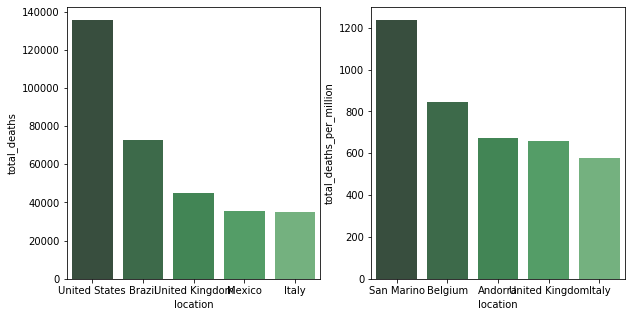

In [81]:
top5_total_deaths = df.loc[df.date == '2020-07-14', ['location', 'total_deaths']].sort_values(
    by="total_deaths", ascending=False)[1:6]
top5_total_deaths_per_million = df.loc[df.date == '2020-07-14', ['location', 'total_deaths_per_million']].sort_values(
    by="total_deaths_per_million", ascending=False)[0:5]
fig, ax = plt.subplots(1,2,figsize=(10,5))    
sns.barplot('location', 'total_deaths', data=top5_total_deaths, 
                 palette = sns.color_palette("Greens_d"),ax = ax[0])
sns.barplot('location', 'total_deaths_per_million', data=top5_total_deaths_per_million, 
                 palette = sns.color_palette("Greens_d"), ax = ax[1])
plt.show()

In [7]:
df.loc[df.date == '2020-07-10'].sort_values(by="total_cases", ascending = False).head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30152,OWID_WRL,NaN,World,2020-07-10,12246269.0,228608.0,554722.0,5441.0,1571.082,29.328,71.166,0.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
28750,USA,North America,United States,2020-07-10,3118008.0,63004.0,133291.0,982.0,9419.888,190.343,402.689,2.967,38919421.0,823375.0,117.580,2.488,657534.0,1.986,units unclear (incl. non-PCR),NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4072,BRA,South America,Brazil,2020-07-10,1755779.0,42619.0,69184.0,1220.0,8260.180,200.504,325.481,5.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
12810,IND,Asia,India,2020-07-10,793802.0,26506.0,21604.0,475.0,575.217,19.207,15.655,0.344,11024491.0,283659.0,7.989,0.206,246677.0,0.179,samples tested,74.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
22812,RUS,Europe,Russia,2020-07-10,707301.0,6509.0,10843.0,176.0,4846.703,44.602,74.300,1.206,22388195.0,308901.0,153.413,2.117,276726.0,1.896,tests performed,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58


In [58]:
df.loc[df.date == '2020-07-14'].sort_values(by="total_deaths", ascending = False).head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30156,OWID_WRL,NaN,World,2020-07-14,13079218.0,189425.0,572662.0,3923.0,1677.942,24.301,73.467,0.503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
28754,USA,North America,United States,2020-07-14,3363056.0,58114.0,135605.0,400.0,10160.209,175.570,409.680,1.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4076,BRA,South America,Brazil,2020-07-14,1884967.0,20286.0,72833.0,733.0,8867.954,95.437,342.648,3.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
28557,GBR,Europe,United Kingdom,2020-07-14,290133.0,530.0,44830.0,11.0,4273.826,7.807,660.372,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
18039,MEX,North America,Mexico,2020-07-14,304435.0,4685.0,35449.0,443.0,2361.192,36.337,274.942,3.436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05


In [9]:
df.loc[df.date == '2020-07-10'].sort_values(by="total_cases_per_million", ascending = False).head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22420,QAT,Asia,Qatar,2020-07-10,102110.0,557.0,142.0,4.0,35441.817,193.332,49.287,1.388,404868.0,4101.0,140.527,1.423,4695.0,1.630,people tested,80.56,2881060.0,227.322,31.9,1.307,0.617,116935.600,NaN,176.690,16.52,0.8,26.9,NaN,1.20,80.23
23476,SMR,Europe,San Marino,2020-07-10,714.0,1.0,42.0,0.0,21038.364,29.465,1237.551,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.80,84.97
2298,BHR,Asia,Bahrain,2020-07-10,31528.0,597.0,103.0,3.0,18528.629,350.850,60.532,1.763,640219.0,NaN,376.249,NaN,9445.0,5.551,units unclear,NaN,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29
5776,CHL,South America,Chile,2020-07-10,306216.0,3133.0,6682.0,109.0,16018.657,163.892,349.546,5.702,1255359.0,17727.0,65.670,0.927,15538.0,0.813,tests performed,78.24,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18
29227,VAT,Europe,Vatican,2020-07-10,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12


In [10]:
df.loc[df.date == '2020-07-10'].sort_values(by="total_deaths_per_million", ascending = False).head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23476,SMR,Europe,San Marino,2020-07-10,714.0,1.0,42.0,0.0,21038.364,29.465,1237.551,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.80,84.97
2944,BEL,Europe,Belgium,2020-07-10,62210.0,0.0,9781.0,3.0,5367.736,0.000,843.945,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.30,11589616.0,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63
625,AND,Europe,Andorra,2020-07-10,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
28553,GBR,Europe,United Kingdom,2020-07-10,287621.0,642.0,44602.0,85.0,4236.823,9.457,657.013,1.252,6977736.0,128125.0,102.786,1.887,102232.0,1.506,tests performed,67.13,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
25547,ESP,Europe,Spain,2020-07-10,253908.0,852.0,28403.0,2.0,5430.632,18.223,607.489,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


### Correlações com a Taxa de Testes


In [11]:
corr = df[['total_tests_per_thousand','total_cases_per_million', 
           'total_deaths_per_million']].corr()

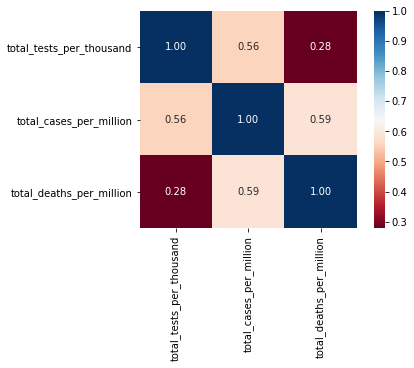

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### Hipótese: países com maior índice de testes, registraram menores taxas de mortes relacionadas ao COVID-19?

Inicialmente, os países que apresentaram melhor controle da COVID-19 haviam realizado testes em massa. Isso ocorria pois conseguiam detectar os casos positivos assintomáticos. Portanto, minha hipótese é de que em países com maiores índices de testes, as taxas de morte seriam menores.  

Conforme a matriz de correlação indica, há uma correlação muito baixa, de 0.28 entre:
* Total de testes por 1.000 pessoas;
* Total de mortes por 1.000.000 de pessoas.

Tal correlação não chega a ser negativa, tornando a hipótese sem fundamento. 
No entanto, variáveis relacionadas aos testes chegam a apresentar quase 71% de valores ausentes.Desta forma, pode ser que os dados sejam insuficientes para esta hipótese.

Além disso, vejamos se há dados ausentes de óbitos em países que possuem dados de teste...

#### Há países com dados de teste e sem dados de mortes?



No dataframe limpo (`df_clean`) encontram-se apenas as entradas com valores não ausentes de testes (`total_tests_per_thousand`). Destaco aqui um País com taxa inferior a 1 teste por 1.000 pessoas, a Nigéria. Nas entradas com menores taxas de teste segue a Indonésia e outros países da África como Zimbabwe, Kenya e Togo. 

Dentre esses cinco países, há dados de óbitos registrados. Para verificar se existem valores ausentes, foi utilizado o parâmtero `na_position='first'`. 

Portanto, não estão ausentes dados de óbitos nos países em que estão disponíveis os dados de teste.


In [13]:
df_clean = df.dropna(subset=['total_tests_per_thousand'])
df_clean.loc[df_clean.date == '2020-07-10'].sort_values
(by='total_tests_per_thousand', ascending = True, na_position='first').head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
20336,NGA,Africa,Nigeria,2020-07-10,30748.0,499.0,689.0,5.0,149.161,2.421,3.342,0.024,175656.0,3725.0,0.852,0.018,4403.0,0.021,samples tested,68.06,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69
13000,IDN,Asia,Indonesia,2020-07-10,70736.0,2657.0,3417.0,58.0,258.610,9.714,12.493,0.212,597468.0,9388.0,2.184,0.034,11464.0,0.042,people tested,54.17,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72
29955,ZWE,Africa,Zimbabwe,2020-07-10,926.0,41.0,12.0,3.0,62.303,2.759,0.807,0.202,36005.0,659.0,2.422,0.044,556.0,0.037,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.70,61.49
14914,KEN,Africa,Kenya,2020-07-10,8975.0,447.0,173.0,4.0,166.911,8.313,3.217,0.074,206584.0,6273.0,3.842,0.117,3768.0,0.070,units unclear,81.48,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.40,66.70
27433,TGO,Africa,Togo,2020-07-10,704.0,9.0,15.0,0.0,85.037,1.087,1.812,0.000,34627.0,509.0,4.183,0.061,335.0,0.040,samples tested,50.93,8278737.0,143.366,19.4,2.839,1.525,1429.813,49.2,280.033,6.15,0.9,14.2,10.475,0.70,61.04


In [14]:
df_clean.loc[df_clean.date == '2020-07-10'].sort_values
(by='total_deaths_per_million', ascending = True, na_position='first').head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28042,UGA,Africa,Uganda,2020-07-10,1000.0,23.0,0.0,0.0,21.862,0.503,0.000,0.000,197765.0,2436.0,4.324,0.053,2696.0,0.059,samples tested,NaN,45741000.0,213.759,16.4,2.168,1.308,1697.707,41.6,213.333,2.50,3.4,16.7,21.222,0.5,63.37
22934,RWA,Africa,Rwanda,2020-07-10,1210.0,16.0,3.0,0.0,93.420,1.235,0.232,0.000,176260.0,3898.0,13.608,0.301,3200.0,0.247,units unclear,NaN,12952209.0,494.869,20.3,2.974,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,NaN,69.02
29955,ZWE,Africa,Zimbabwe,2020-07-10,926.0,41.0,12.0,3.0,62.303,2.759,0.807,0.202,36005.0,659.0,2.422,0.044,556.0,0.037,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27433,TGO,Africa,Togo,2020-07-10,704.0,9.0,15.0,0.0,85.037,1.087,1.812,0.000,34627.0,509.0,4.183,0.061,335.0,0.040,samples tested,50.93,8278737.0,143.366,19.4,2.839,1.525,1429.813,49.2,280.033,6.15,0.9,14.2,10.475,0.7,61.04
21524,PRY,South America,Paraguay,2020-07-10,2638.0,84.0,20.0,0.0,369.855,11.777,2.804,0.000,87203.0,2212.0,12.226,0.310,1874.0,0.263,people tested,NaN,7132530.0,17.144,26.5,6.378,3.833,8827.010,1.7,199.128,8.27,5.0,21.6,79.602,1.3,74.25


In [29]:
df_clean.loc[df_clean.date == '2020-07-10'].shape

(65, 34)

#### Ponto crítico do dataset

O ponto mais crítico do dataset dá-se pelos dados ausentes em relação aos testes (quase 71% de valores ausentes de testes).
No Brasil, a taxa de mortes por COVID-19 é de mais de 325 pessoas por milhão. No entanto, os dados de teste encontram-se ausentes. Na Nigéria, em que os dados indicam a menor taxa de testes, a taxa de mortes é pouco maior que 3 pessoas por milhão.

### Correlações entre taxas

Foram analisadas algumas correlações com total de óbitos por milhão:
* índice de resposta do Governo  (Valor dimensionado entre 0 e 100, que abrange 9 indicadores para contenção como fechamento de escolas e proibição de viagens);
* Densidade demográfica do País;
* Idade média da população daquela localidade;
* Proporção da população com mais de 65 anos;
* Produto interno bruto por pessoa;
* Porcentagem da população que vive em extrema pobreza;
* Taxa de mortes por doenças cardiovasculares;
* Porcentagem da população com diabetes;
* Porcentagem de mulheres  e homens fumantes;
* Leitos de hospital por  1.000  pessoas;
* Expectativa de vida.

Os resultados indicaram algumas correlações baixas,mas muito inconsistentes. Por exemplo, a correlação linear entre mortes por COVID-19 e taxa de doenças cardiovasculares e diabetes foram negativas, indicando que são inversamente proporcionais. No entanto, os casos com maior risco são justamente pacientes com comorbidades. 

#### Diferença entre Países

Uma das possíveis causas da dificuldade em se estabelecer correlações neste dataset é a diferença na obtenção dos dados. Cada País adota uma premissa para registro de seus dados. 

Por exemplo, na Bélgica a taxa de óbitos está entre as mais altas. A primeira-ministra da Bélgica, Sophie Wilmes, explica que eles adotaram o método de contagem não só dos casos confirmados, mas também dos suspeitos.

Alguns países registram apenas os testes positivos nos laboratórios públicos. No Brasil realizam testes apenas em pacientes com comorbidades, no entanto, os dados de teste sequer são disponibilizados.

In [24]:
corr_2 = df_clean[['total_deaths_per_million','stringency_index','population_density',
             'median_age','aged_65_older','gdp_per_capita','extreme_poverty',
             'cvd_death_rate','diabetes_prevalence', 'female_smokers',
             'male_smokers','hospital_beds_per_thousand','life_expectancy'
             ]].corr()
print(corr_2)

                            total_deaths_per_million  ...  life_expectancy
total_deaths_per_million                    1.000000  ...         0.278019
stringency_index                            0.008332  ...        -0.255885
population_density                         -0.024931  ...         0.090255
median_age                                  0.246943  ...         0.783062
aged_65_older                               0.265885  ...         0.693524
gdp_per_capita                              0.265194  ...         0.665792
extreme_poverty                            -0.179673  ...        -0.704864
cvd_death_rate                             -0.262834  ...        -0.520791
diabetes_prevalence                        -0.146056  ...         0.068814
female_smokers                              0.230946  ...         0.494411
male_smokers                               -0.117194  ...         0.036054
hospital_beds_per_thousand                 -0.008134  ...         0.395467
life_expectancy          

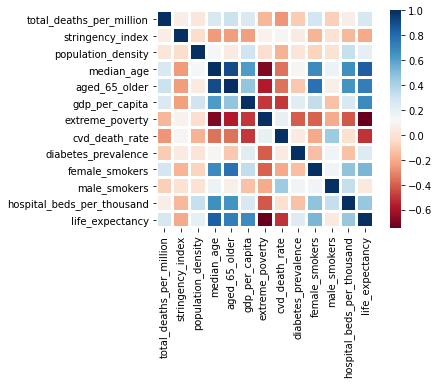

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr_2, cmap='RdBu', fmt='.2f', linewidths=2.0, square=True, linecolor='white');

### Novos casos

Nota-se aumento progressivo da quantidade de novos casos registrados diariamente.

#### No mundo

No mundo, observa-se na figura 1 uma curva de crescimento mais inclinada até Abril de 2020 e uma nova curva de crescimento até o presente momento. 
Embora os novos casos tenham aumentado, a quantidade de novos óbitos registrados mantém-se na base e não indica aumento proporcional à quantidade de novos casos.

#### No Brasil

No Brasil, a quantidade de novos casos indica um aumento no mês de Julho. No entanto, os novos casos de mortes registrados não indicam aumento progressivo como os novos casos, podemos observar os novos óbitos na base da figura 2, na cor laranja.

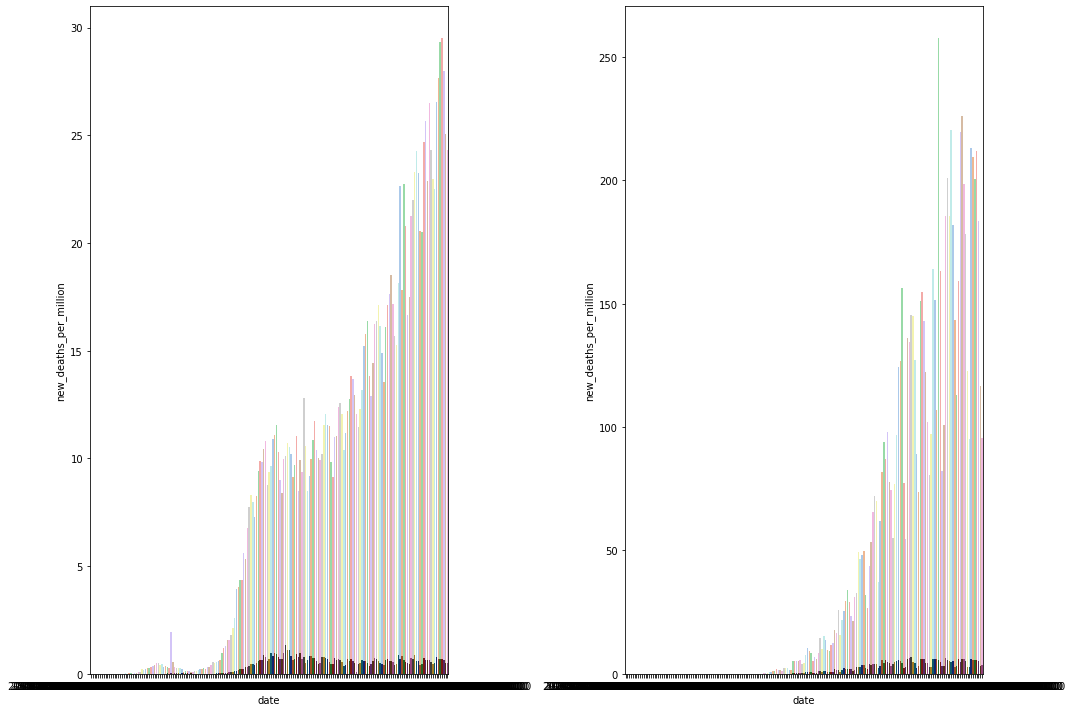

In [93]:
df_world = df.loc[df.location == 'World']
df_brazil = df.loc[df.location == 'Brazil']
fig, ax = plt.subplots(1,2, figsize = (15,10))

sns.barplot('date',  'new_cases_per_million', data = df_world, 
                 palette = sns.color_palette("pastel"),ax = ax[0])
sns.barplot('date',  'new_deaths_per_million', data = df_world, 
                 palette = sns.color_palette("dark"),ax = ax[0])
sns.barplot('date', 'new_cases_per_million', data = df_brazil, 
            palette = sns.color_palette("pastel"), ax = ax[1])
sns.barplot('date', 'new_deaths_per_million', data = df_brazil, 
            palette = sns.color_palette("dark"), ax = ax[1])
#ax[0].bar( 'date', 'new_cases_per_million', data = df_world)
#ax[0].bar('date', 'new_deaths_per_million', data = df_world)
#ax[1].bar('date', 'new_cases_per_million', data = df_brazil)
#ax[1].bar('date','new_deaths_per_million',data = df_brazil)
plt.tight_layout()

## Conclusão

Uma sugestão é que o Ministério da Saúde no Brasil disponibilize os dados referentes a todos os pacientes que são registrados e tratados como COVID-19, inclusive os pacientes que não são testados, já que todos os pacientes suspeitos são devidamente registrados, inclusive por médicos particulares. 